DBSCAN using 7 PCA Components (Retain ~80% Variance)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator

import itertools

In [162]:
feature_data = pd.read_csv("pca_80.csv")
feature_data = feature_data.drop("Unnamed: 0", axis=1)

scaler = StandardScaler()
scaler.fit(feature_data.to_numpy())
scaled_data = scaler.transform(feature_data.to_numpy())

# scaled_data = feature_data

Determining Best EPS Value

Calcuating Distance to 5th Nearest Neighbor

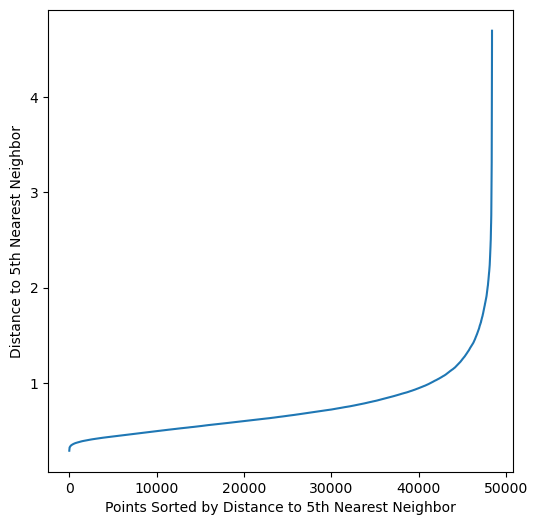

Elbow Distance: 2.2292874080853484


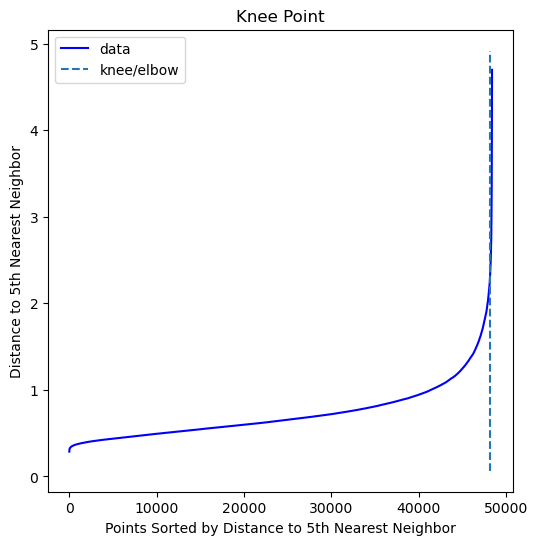

In [163]:
neighbors = NearestNeighbors(n_neighbors=15).fit(scaled_data)
distances, indices = neighbors.kneighbors(scaled_data)

# distances gives the array of distances from each point to its kth neighbor
# incices gives an array of the corresponding index of each point

# print(distances)
# print(indices)

distances = np.sort(distances[:,14], axis=0)
# only want to see distances to 5th nearest neighbor
# sort the points according to distance to 5th nearest neighbor

fig = plt.figure(figsize=(6, 6))
plt.plot(distances)
plt.xlabel("Points Sorted by Distance to 5th Nearest Neighbor")
plt.ylabel("Distance to 5th Nearest Neighbor")

plt.show()


kl = KneeLocator(np.arange(len(distances)), distances, curve="convex", direction="increasing")
kl.plot_knee()
plt.xlabel("Points Sorted by Distance to 5th Nearest Neighbor")
plt.ylabel("Distance to 5th Nearest Neighbor")

print("Elbow Distance: " + str(distances[kl.elbow]))

In [164]:
db = DBSCAN(min_samples=14, eps=2.229)
db.fit(scaled_data)

print(np.unique(db.labels_))


[-1  0  1]


In [136]:
# Clustering Evaluation

print("Labels:")
print(np.unique(db.labels_))
# -1 indicates outlier


db_index = davies_bouldin_score(scaled_data, db.labels_)
print("DB Index: " + str(db_index))

silhouette_coefficient = silhouette_score(scaled_data, db.labels_)
print("Silhouette Coefficient: " + str(silhouette_coefficient))

Labels:
[-1  0  1  2  3]
DB Index: 1.3952930537786692
Silhouette Coefficient: 0.4752876788773461


Listing Tags/Labels

In [165]:
def parse_tags(tag):
    tag = tag.strip("[")
    tag = tag.strip("]")
    labels = []
    if ", " in tag: 
        for label in tag.split(", "):
            labels.append(label.strip("'"))
    else:
        labels = [tag.strip("'")]
    return labels

labeled_data = pd.read_csv("single_tags.csv")

In [166]:
tags_represented = {
    -1: {},
    0: {},
    1: {},
    2: {},
    3: {},
}

for i in np.unique(db.labels_):
    indices = np.where(db.labels_ == i)[0]
    for index in indices:
        for label in parse_tags(labeled_data._get_value(index, "seeds")):
            if  label not in tags_represented[i].keys():
                tags_represented[i].update({label: 1})
            else:
                tags_represented[i][label] += 1

print(tags_represented)

{-1: {'aggressive': 1, 'angry': 1, 'demonic': 1, 'explosive': 1, 'fierce': 1, 'intense': 1, 'apocalyptic': 1, 'eerie': 2, 'gloomy': 3, 'halloween': 1, 'macabre': 2, 'scary': 4, 'bitter': 1, 'lonely': 1, 'ethereal': 1, 'gentle': 1, 'wry': 1, 'dramatic': 1, 'eccentric': 1, 'indulgent': 1, 'lush': 1, 'mysterious': 1, 'spiritual': 1, 'cheerful': 1, 'comic': 1, 'humorous': 5, 'playful': 2, 'positive': 1, 'silly': 10, 'gritty': 2, 'organic': 1, 'erotic': 1, 'exotic': 1, 'romantic': 1, 'sleazy': 1, 'cerebral': 1, 'martial': 1, 'narrative': 3, 'technical': 1, 'negative': 1, 'tragic': 1, 'powerful': 1, 'autumnal': 1, 'child-like': 5, 'graceful': 1, 'light': 1, 'poignant': 1, 'pure': 3, 'sacred': 1, 'whimsical': 2, 'druggy': 1, 'hypnotic': 2, 'spacey': 1, 'trippy': 1, 'exciting': 1, 'lively': 1}, 0: {'aggressive': 606, 'angry': 592, 'angst-ridden': 7, 'confrontational': 15, 'defiant': 46, 'demonic': 38, 'explosive': 75, 'fierce': 446, 'harsh': 216, 'hostile': 8, 'hyper': 181, 'intense': 439, 'ma

In [167]:
cluster_zero = tags_represented[0]

cluster_zero = dict(sorted(cluster_zero.items(), key=lambda item: item[1]))

tags_1= np.array(list(cluster_zero.keys())).reshape(-1, 1)
occurrences_1 = np.array(list(cluster_zero.values())).reshape(-1, 1)


cluster_zero_occurrences = np.flip(np.hstack((tags_1, occurrences_1)), axis=0)

print(cluster_zero_occurrences)


[['sleazy' '722']
 ['sexy' '639']
 ['aggressive' '606']
 ['romantic' '598']
 ['erotic' '593']
 ['angry' '592']
 ['smooth' '587']
 ['epic' '583']
 ['lyrical' '569']
 ['light' '547']
 ['lush' '546']
 ['energetic' '538']
 ['positive' '533']
 ['lazy' '533']
 ['exotic' '527']
 ['cheerful' '512']
 ['fun' '511']
 ['uplifting' '510']
 ['spiritual' '509']
 ['gloomy' '506']
 ['happy' '500']
 ['warm' '494']
 ['sentimental' '489']
 ['nostalgic' '482']
 ['powerful' '478']
 ['hypnotic' '469']
 ['relaxed' '468']
 ['quiet' '466']
 ['optimistic' '461']
 ['sensual' '460']
 ['mellow' '454']
 ['peaceful' '454']
 ['dark' '454']
 ['eerie' '452']
 ['gritty' '448']
 ['fierce' '446']
 ['sweet' '440']
 ['bittersweet' '439']
 ['intense' '439']
 ['lonely' '438']
 ['technical' '437']
 ['dramatic' '436']
 ['soothing' '436']
 ['mysterious' '435']
 ['spooky' '435']
 ['gentle' '434']
 ['cold' '429']
 ['organic' '423']
 ['silly' '421']
 ['quirky' '417']
 ['calm' '414']
 ['soft' '408']
 ['playful' '398']
 ['thoughtful' 

In [168]:
cluster_one = tags_represented[1]

cluster_one = dict(sorted(cluster_one.items(), key=lambda item: item[1]))

tags_1= np.array(list(cluster_one.keys())).reshape(-1, 1)
occurrences_1 = np.array(list(cluster_one.values())).reshape(-1, 1)


cluster_one_occurrences = np.flip(np.hstack((tags_1, occurrences_1)), axis=0)

print(cluster_one_occurrences)

[['sacred' '16']
 ['mysterious' '14']
 ['gentle' '12']
 ['technical' '11']
 ['organic' '11']
 ['dramatic' '10']
 ['romantic' '9']
 ['dark' '9']
 ['peaceful' '8']
 ['tender' '8']
 ['exotic' '8']
 ['spiritual' '8']
 ['meditative' '8']
 ['lazy' '8']
 ['cold' '8']
 ['quiet' '7']
 ['atmospheric' '7']
 ['nostalgic' '7']
 ['theatrical' '7']
 ['soothing' '7']
 ['scary' '7']
 ['eerie' '7']
 ['trippy' '6']
 ['martial' '6']
 ['sensual' '6']
 ['bitter' '6']
 ['soft' '5']
 ['mellow' '5']
 ['hypnotic' '5']
 ['powerful' '5']
 ['tragic' '5']
 ['sad' '5']
 ['narrative' '5']
 ['lyrical' '5']
 ['earthy' '5']
 ['silly' '5']
 ['lonely' '5']
 ['spooky' '5']
 ['harsh' '5']
 ['quirky' '4']
 ['spacey' '4']
 ['light' '4']
 ['smooth' '4']
 ['sentimental' '4']
 ['reflective' '4']
 ['melancholy' '4']
 ['sophisticated' '4']
 ['eccentric' '4']
 ['relaxed' '4']
 ['ethereal' '4']
 ['nocturnal' '4']
 ['gloomy' '4']
 ['apocalyptic' '4']
 ['ominous' '4']
 ['calm' '3']
 ['whimsical' '3']
 ['pure' '3']
 ['poignant' '3']
 [

In [155]:
cluster_two = tags_represented[2]

cluster_two = dict(sorted(cluster_two.items(), key=lambda item: item[1]))

tags_2= np.array(list(cluster_two.keys())).reshape(-1, 1)
occurrences_2 = np.array(list(cluster_two.values())).reshape(-1, 1)


cluster_two_occurrences = np.flip(np.hstack((tags_2, occurrences_2)), axis=0)

print(cluster_two_occurrences)

[]


In [156]:
cluster_three = tags_represented[3]

cluster_four = dict(sorted(cluster_three.items(), key=lambda item: item[1]))

tags_2= np.array(list(cluster_three.keys())).reshape(-1, 1)
occurrences_2 = np.array(list(cluster_three.values())).reshape(-1, 1)


cluster_three_occurrences = np.flip(np.hstack((tags_2, occurrences_2)), axis=0)

print(cluster_three_occurrences)

[]


In [169]:
outliers = tags_represented[-1]

outliers = dict(sorted(outliers.items(), key=lambda item: item[1]))

tags_0= np.array(list(outliers.keys())).reshape(-1, 1)
occurrences_0 = np.array(list(outliers.values())).reshape(-1, 1)

outliers_occurrences = np.flip(np.hstack((tags_0, occurrences_0)), axis=0)

print(outliers_occurrences)
print(outliers)

[['silly' '10']
 ['child-like' '5']
 ['humorous' '5']
 ['scary' '4']
 ['pure' '3']
 ['narrative' '3']
 ['gloomy' '3']
 ['hypnotic' '2']
 ['whimsical' '2']
 ['gritty' '2']
 ['playful' '2']
 ['macabre' '2']
 ['eerie' '2']
 ['lively' '1']
 ['exciting' '1']
 ['trippy' '1']
 ['spacey' '1']
 ['druggy' '1']
 ['sacred' '1']
 ['poignant' '1']
 ['light' '1']
 ['graceful' '1']
 ['autumnal' '1']
 ['powerful' '1']
 ['tragic' '1']
 ['negative' '1']
 ['technical' '1']
 ['martial' '1']
 ['cerebral' '1']
 ['sleazy' '1']
 ['romantic' '1']
 ['exotic' '1']
 ['erotic' '1']
 ['organic' '1']
 ['positive' '1']
 ['comic' '1']
 ['cheerful' '1']
 ['spiritual' '1']
 ['mysterious' '1']
 ['lush' '1']
 ['indulgent' '1']
 ['eccentric' '1']
 ['dramatic' '1']
 ['wry' '1']
 ['gentle' '1']
 ['ethereal' '1']
 ['lonely' '1']
 ['bitter' '1']
 ['halloween' '1']
 ['apocalyptic' '1']
 ['intense' '1']
 ['fierce' '1']
 ['explosive' '1']
 ['demonic' '1']
 ['angry' '1']
 ['aggressive' '1']]
{'aggressive': 1, 'angry': 1, 'demonic':

In [170]:
dbscan_pca80 = pd.read_csv("single_tags.csv")
dbscan_pca80 = dbscan_pca80.drop("Unnamed: 0", axis=1)

print(dbscan_pca80.shape)
dbscan_pca80.insert(len(dbscan_pca80.columns), "Labels", db.labels_, True)

print(dbscan_pca80.shape)

dbscan_pca80.to_csv("dbscan_pca80.csv")

(48390, 22)
(48390, 23)


Visualization

In [171]:
array_of_features = pd.read_csv("dbscan_pca80.csv")
array_of_features = array_of_features.drop("Unnamed: 0", axis=1)


pca_feat = pd.read_csv("pca_80.csv")
pca_feat = pca_feat.drop("Unnamed: 0", axis=1)

feature_data = pd.read_csv("relevant_features_single_tags.csv")
feature_data["loudness"] *= -1
for column in feature_data.keys():
    feature_data[column] = feature_data[column] /feature_data[column].abs().max()
array_of_standardized_features = feature_data

list_of_rows = ["0", "1", "2", "3", "4", "5", "6"]

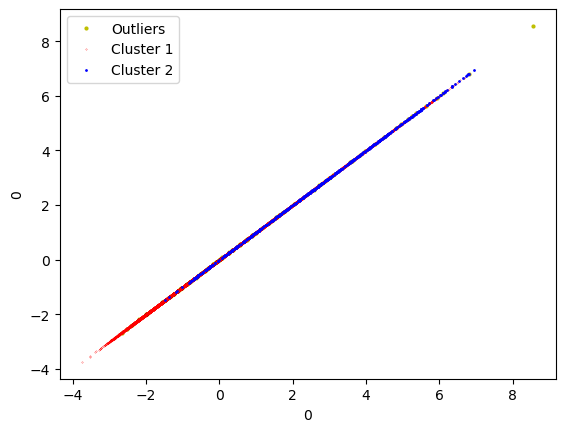

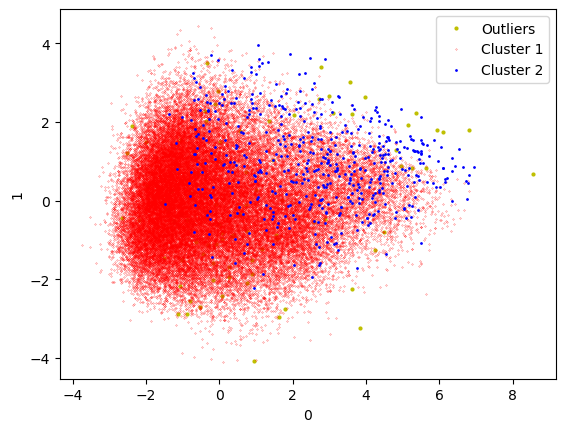

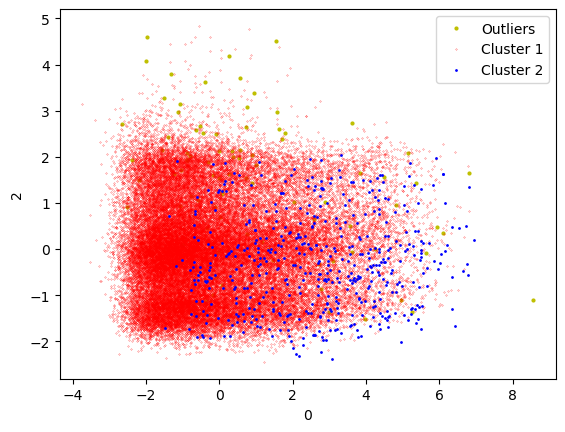

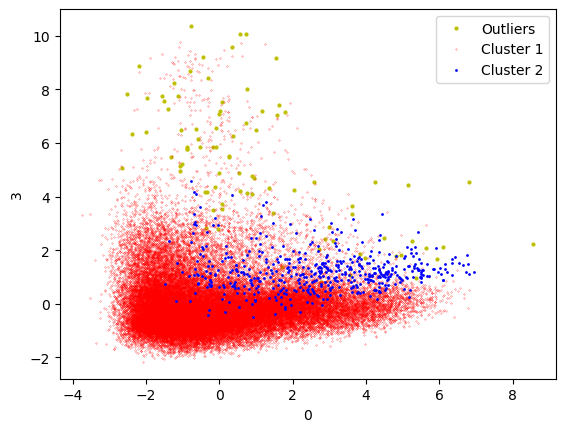

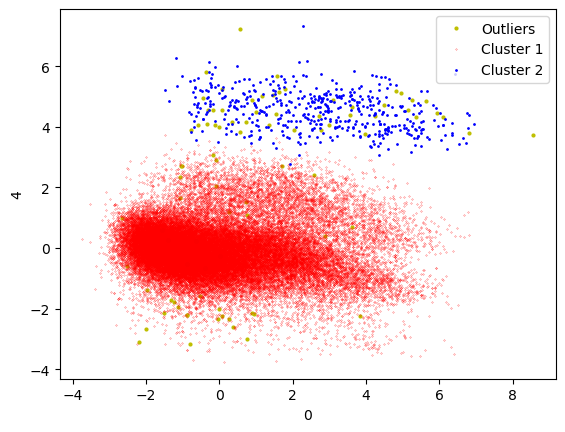

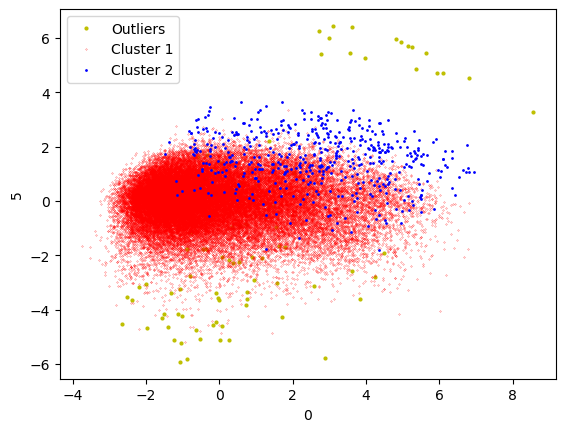

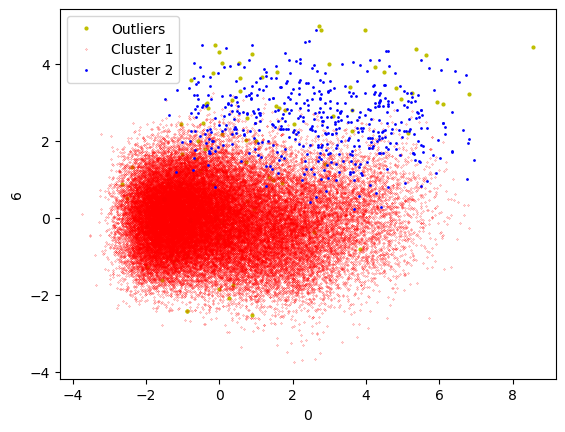

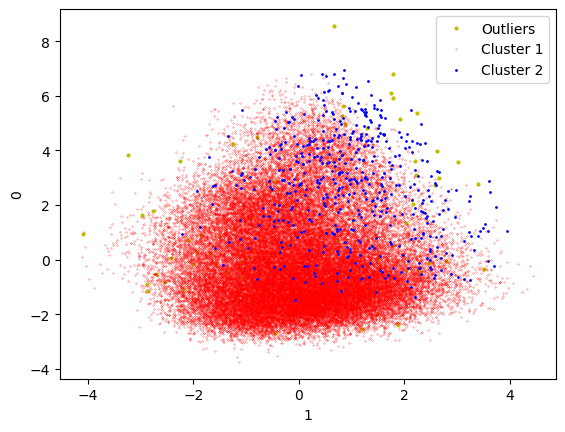

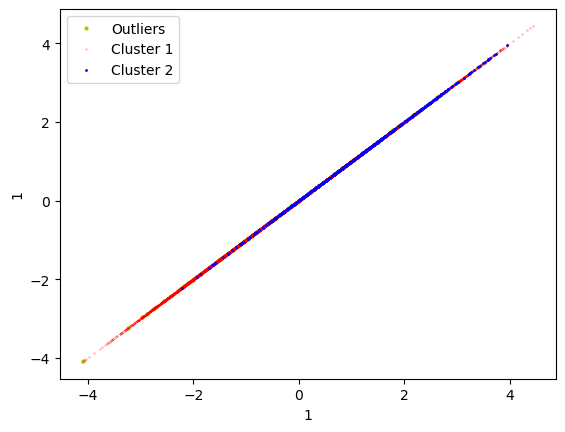

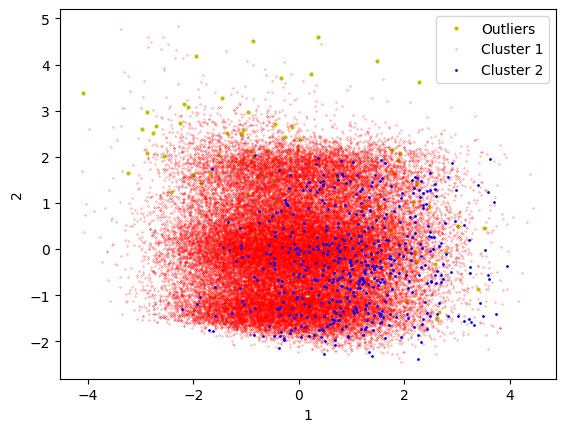

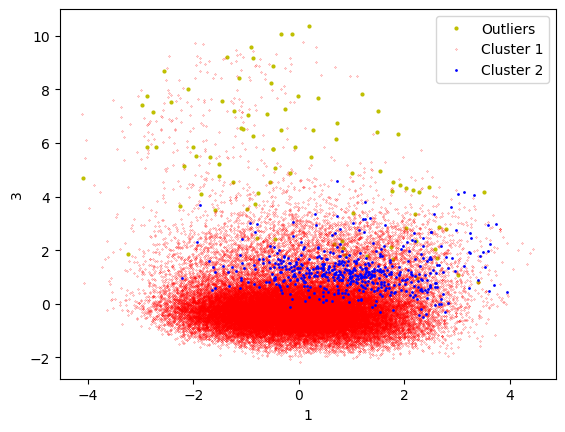

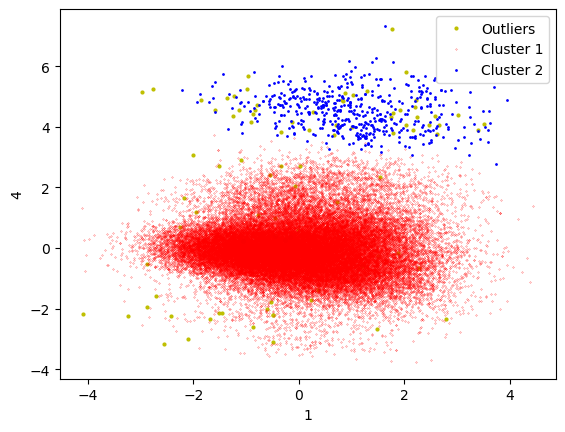

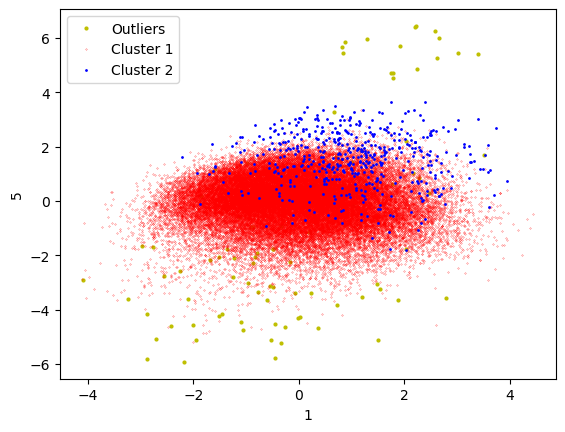

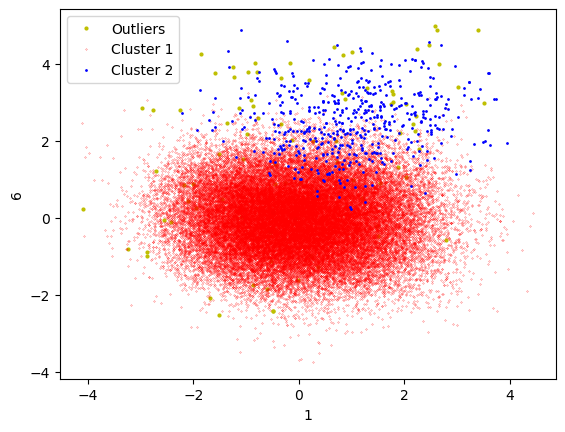

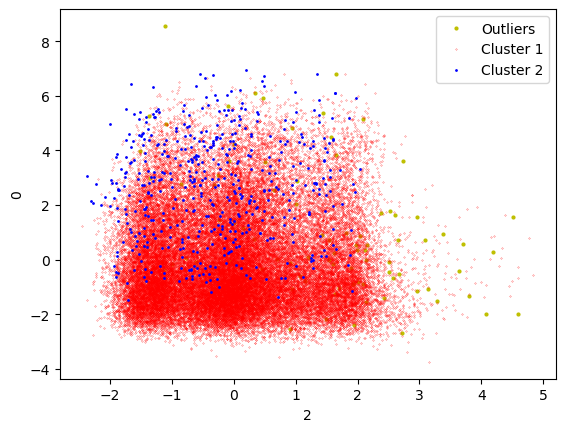

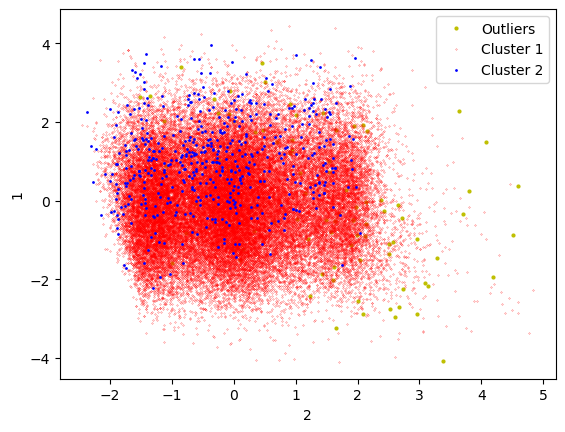

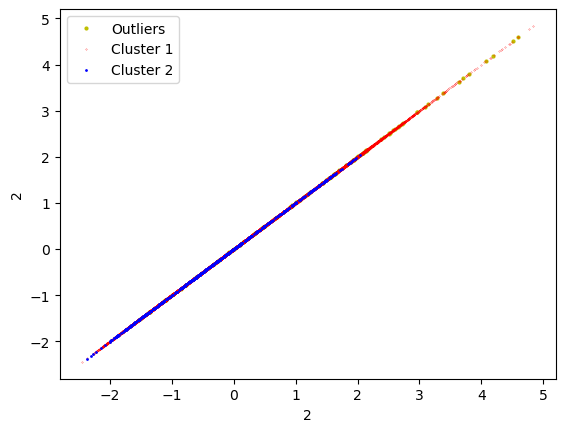

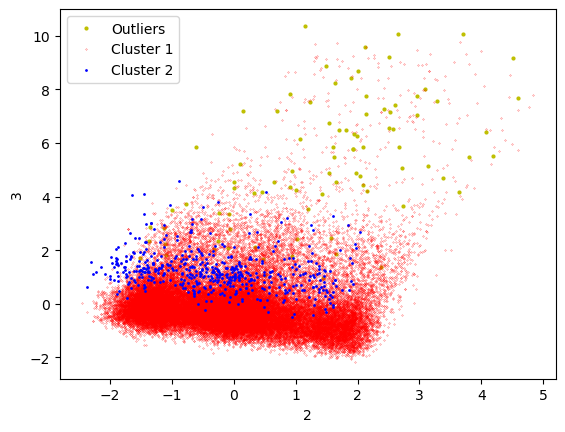

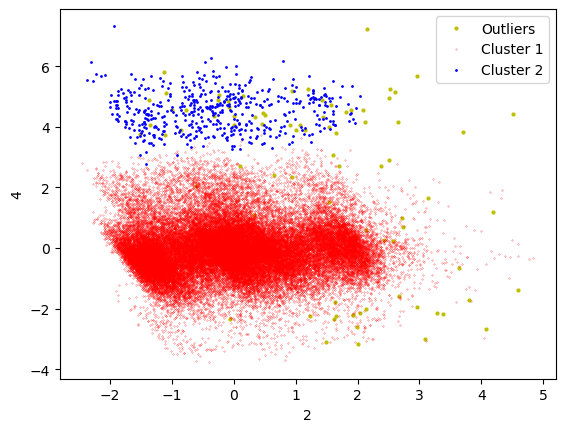

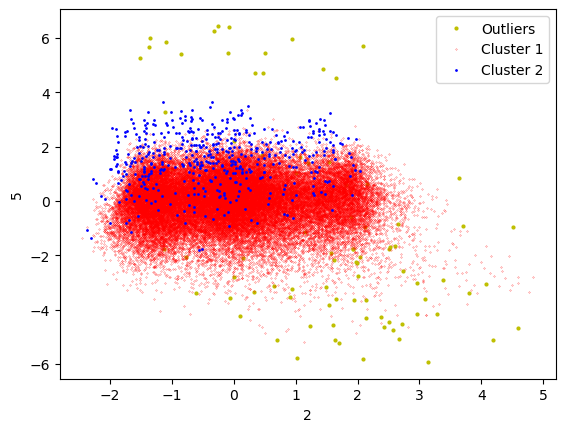

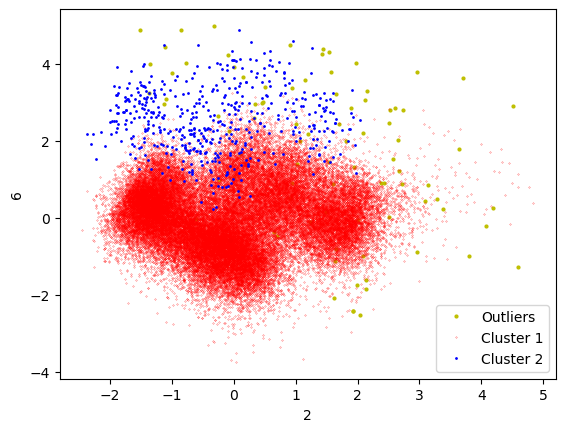

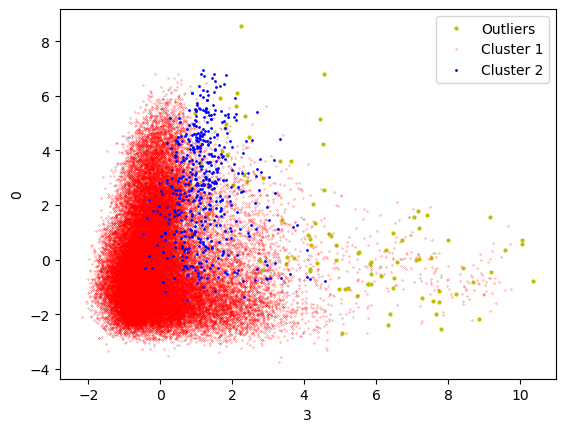

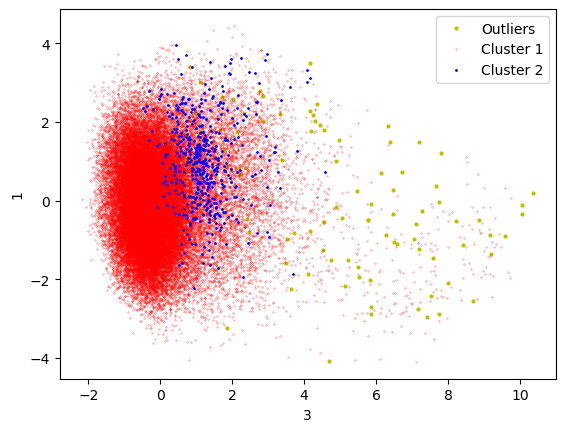

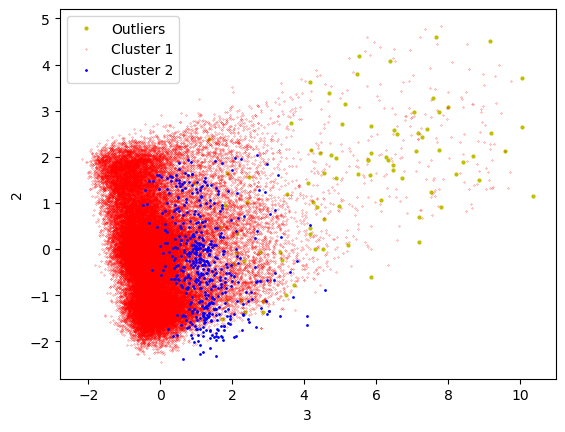

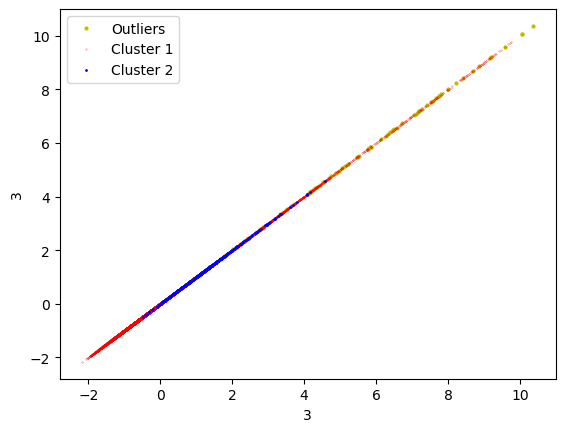

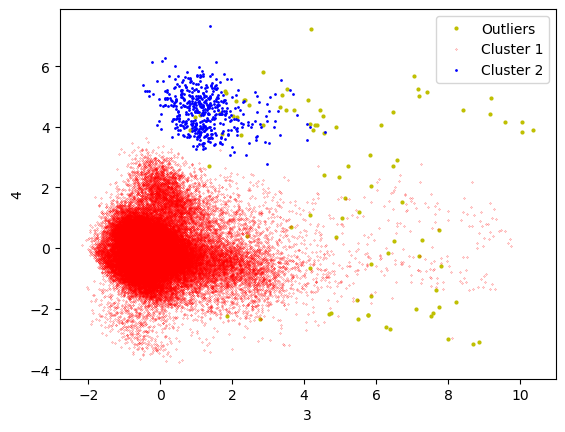

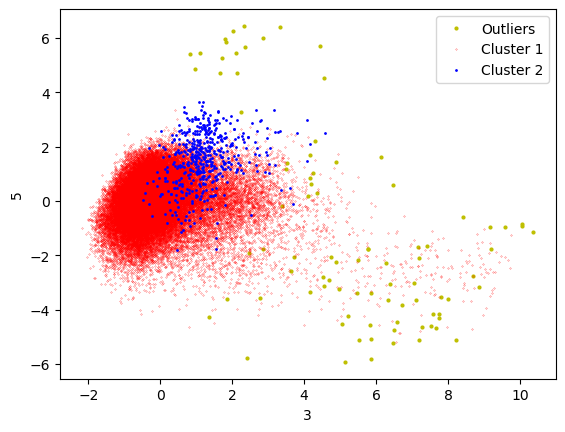

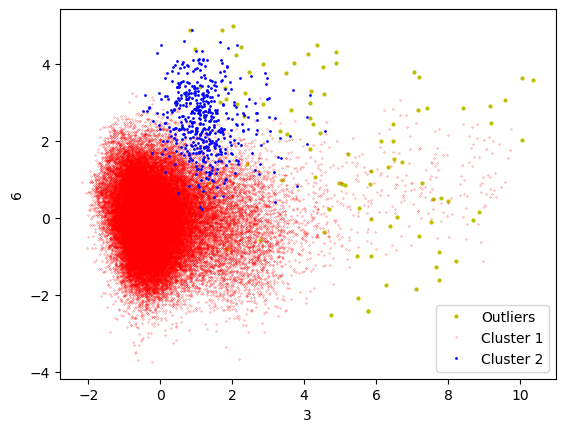

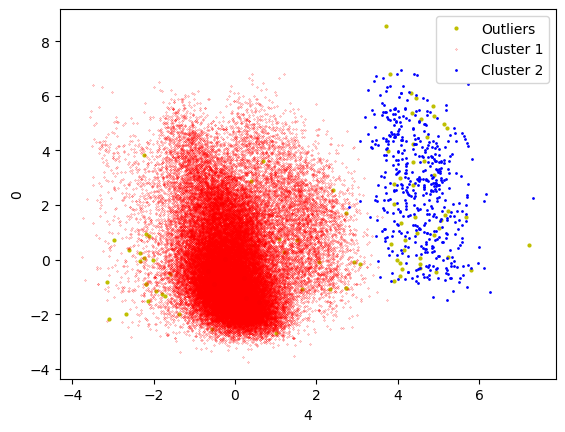

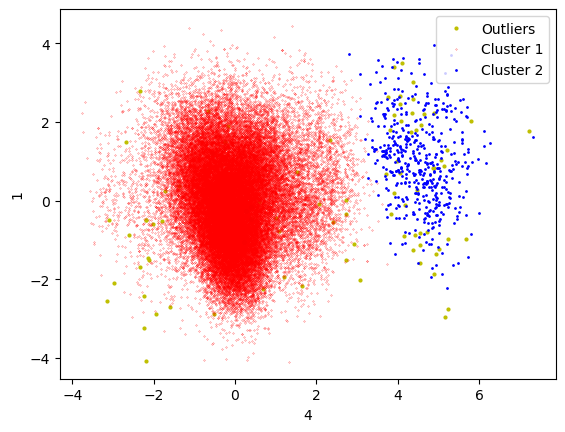

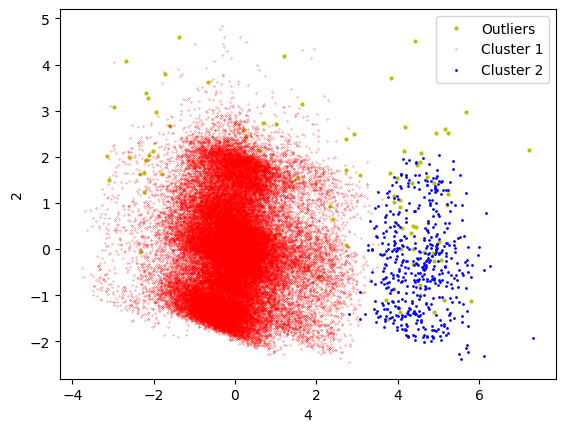

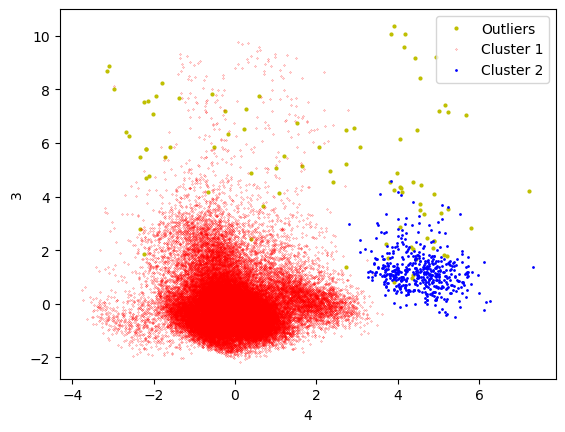

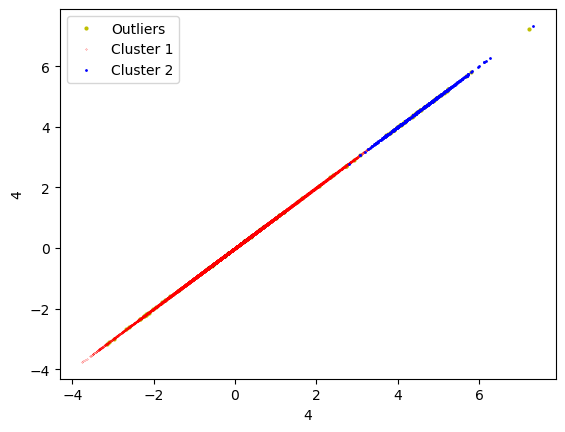

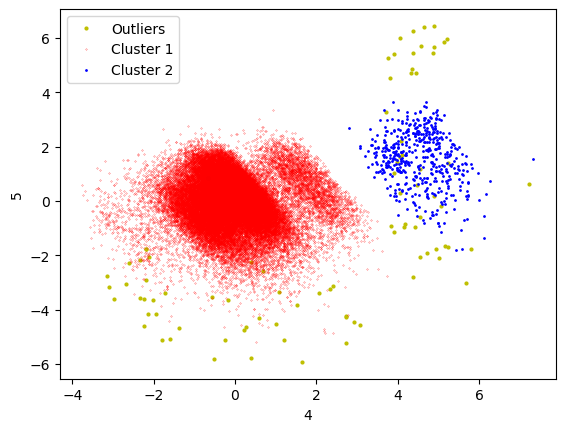

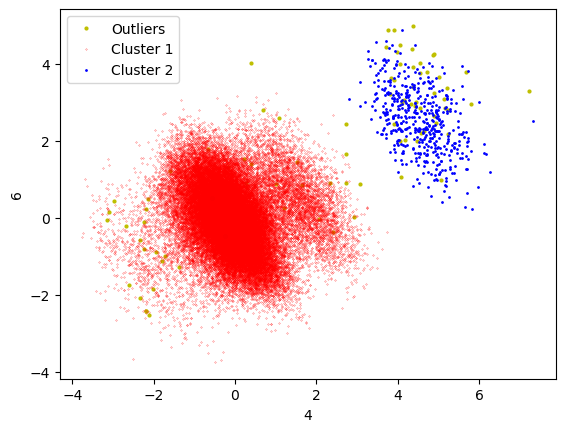

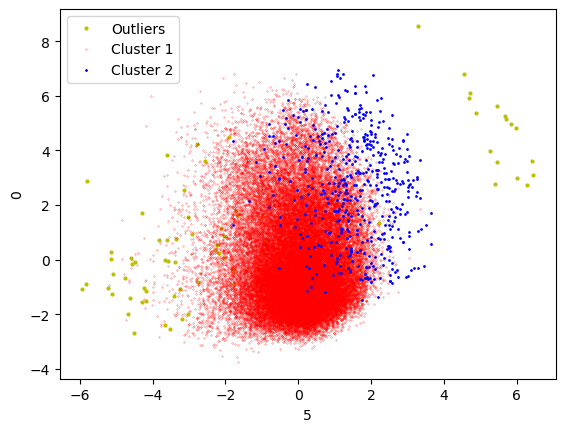

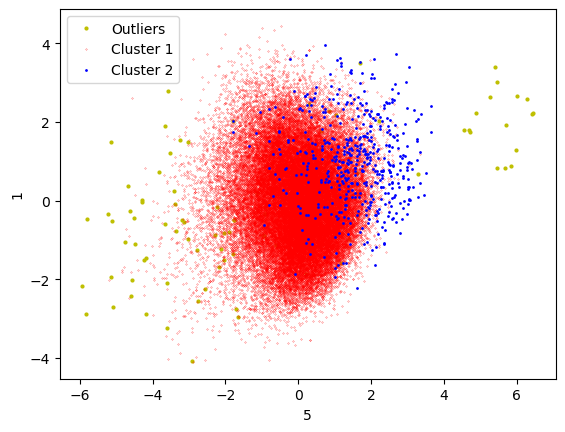

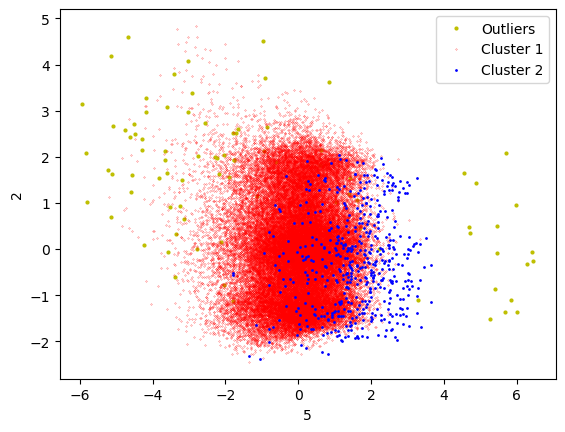

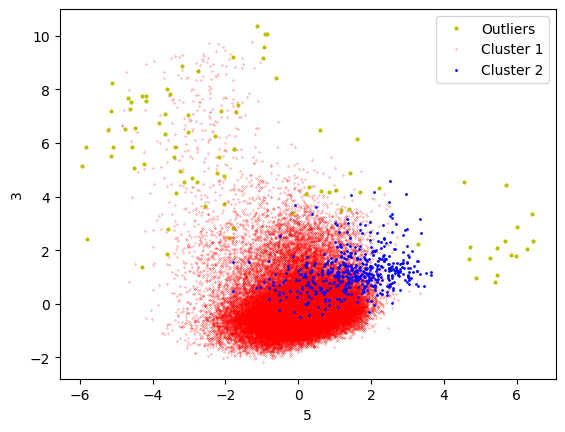

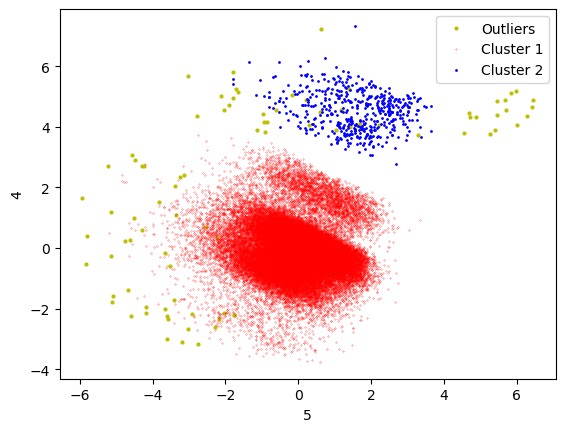

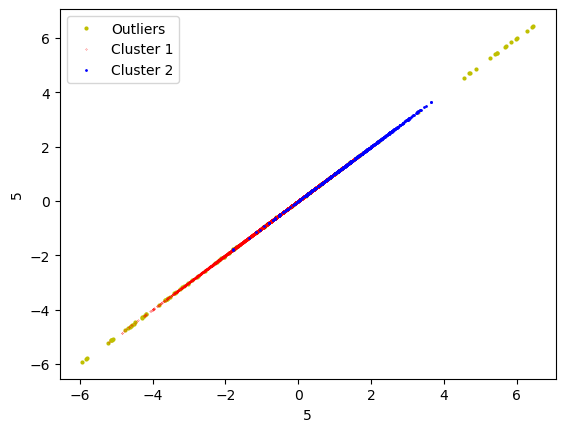

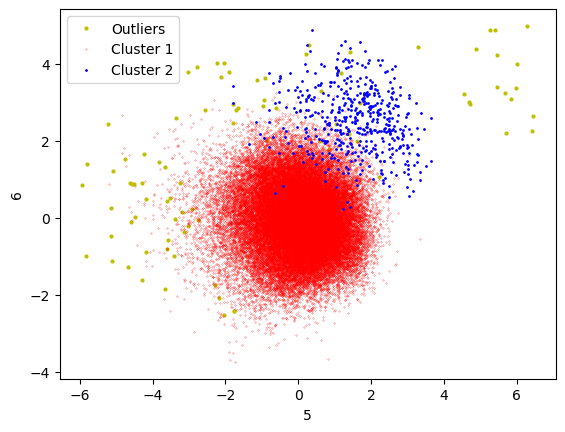

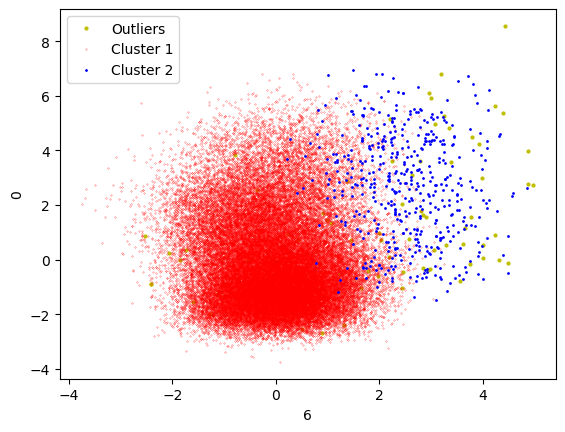

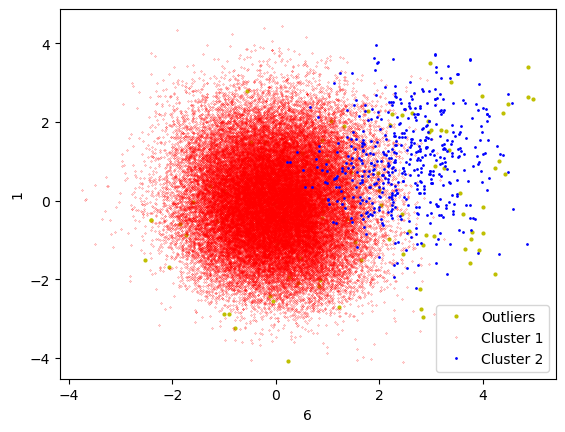

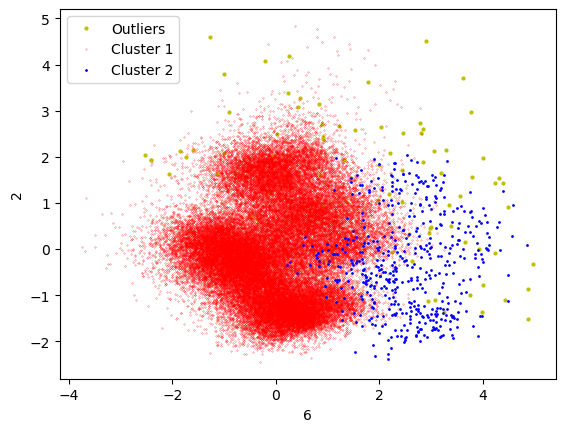

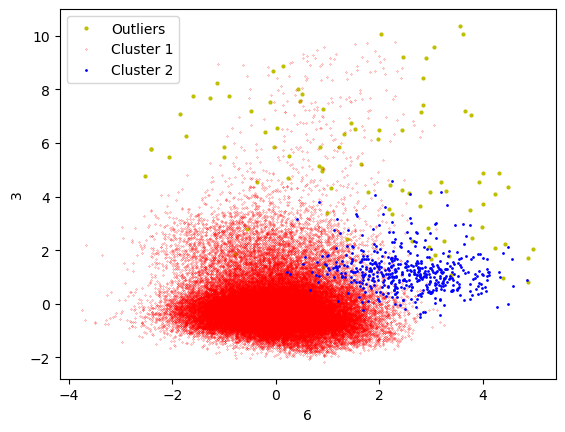

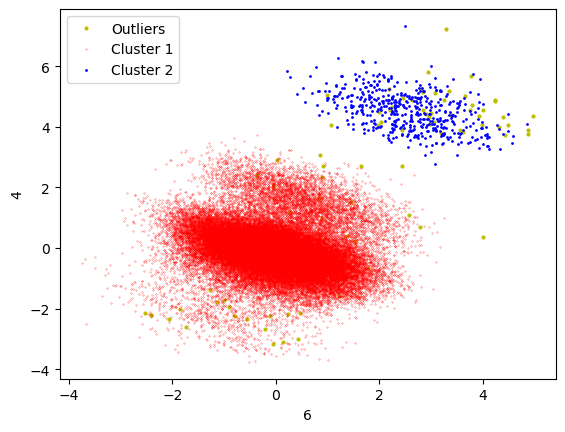

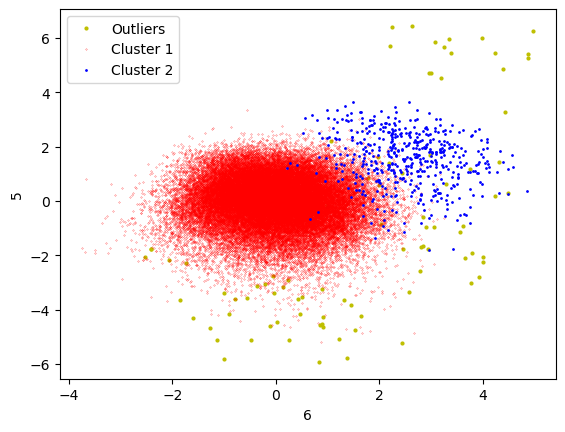

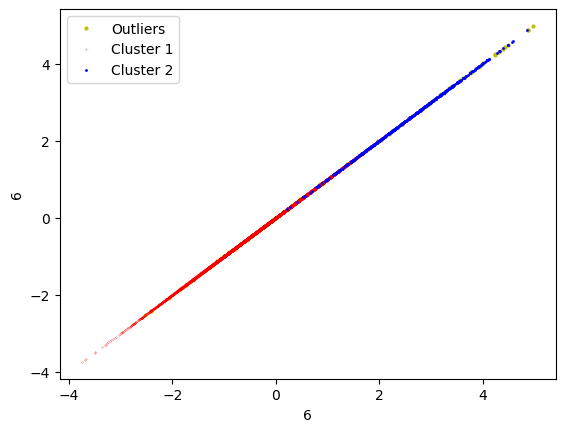

In [173]:
outliers = pca_feat[array_of_features["Labels"] == -1]
cluster_zero = pca_feat[array_of_features["Labels"] == 0]
cluster_one = pca_feat[array_of_features["Labels"] == 1]
cluster_two = pca_feat[array_of_features["Labels"] == 2]
cluster_three = pca_feat[array_of_features["Labels"] == 3]

for (choice_1, choice_2) in itertools.product(list_of_rows, repeat=2):
    plt.plot(outliers[choice_1], outliers[choice_2], "yo", label="Outliers", markersize=2)
    plt.plot(cluster_zero[choice_1], cluster_zero[choice_2], "ro", label="Cluster 1", markersize=.2)
    plt.plot(cluster_one[choice_1], cluster_one[choice_2], "bo", label="Cluster 2", markersize=1)
    # plt.plot(cluster_two[choice_1], cluster_two[choice_2], "go", label="Cluster 3", markersize=2)
    # plt.plot(cluster_three[choice_1], cluster_three[choice_2], "mo", label="Cluster 4", markersize=2)

    plt.xlabel(choice_1)
    plt.ylabel(choice_2)

    plt.legend()

    plt.show()